In [109]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gender_guesser.detector as gender
import time
import collections

In [110]:
#load the csv file of dataset
sf_data=pd.read_csv('C:/Users/Nivedha/Documents/data/Salaries.csv')
sf_data.head()

C:\Users\Nivedha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.



Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

  SanFrancisco_BasePay SanFrancisco_OvertimePay SanFrancisco_OtherPay  \
0               167411                        0                400184   
1               155966                   245132                137811   
2               212739                   106088               16452.6   
3                77916                  56120.7                198307   
4               134402                     9737                182235   

  SanFrancisco_Benefits  SanFrancsico_TotalPay  Total Pay & Benefits  \
0                   NaN              567595.43             567595.43   
1                   NaN              538909.28             538909.28   
2                   NaN              335279.91             335279.91   
3                   NaN              332343.61             332343.61   
4                   NaN              326373.19             326373.19   

   SanFrancisco_Year  SanFrancisco_Notes         Agency SanFrancisco_Status  
0               2011                 NaN  San Francisco                 NaN  
1               2011                 NaN  San Francisco                 NaN  
2               2011                 NaN  San Francisco                 NaN  
3               2011                 NaN  San Francisco                 NaN  
4               2011                 NaN  San Francisco                 NaN

In [111]:
#Data cleaning
#Pandas nunique() is used to get a count of unique values.
sf_data['JobTitle'].nunique()

2159

In [131]:
#Obtain the count of data values in every column
sf_data['SanFrancisco_Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: SanFrancisco_Year, dtype: int64

In [132]:
sf_data['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [133]:
sf_data['SanFrancisco_Status'].value_counts()

FT    22334
PT    15785
Name: SanFrancisco_Status, dtype: int64

In [112]:
#Analysing the null values
def pay_clean(xy):
    cols=['SanFrancisco_BasePay','SanFrancisco_OvertimePay', 'SanFrancisco_OtherPay', 'SanFrancisco_Benefits']
    print("Looking for Null values")
    for c in cols:
        xy[c]=pd.to_numeric(xy[c],errors='coerce')
        print(len(c))
        print(c)
        print(len(c))
        print(xy[c].isnull().value_counts())
        
    return xy
sf_data=pay_clean(sf_data.copy())

Looking for Null values
20
SanFrancisco_BasePay
20
False    148045
True        609
Name: SanFrancisco_BasePay, dtype: int64
24
SanFrancisco_OvertimePay
24
False    148650
True          4
Name: SanFrancisco_OvertimePay, dtype: int64
21
SanFrancisco_OtherPay
21
False    148650
True          4
Name: SanFrancisco_OtherPay, dtype: int64
21
SanFrancisco_Benefits
21
False    112491
True      36163
Name: SanFrancisco_Benefits, dtype: int64


In [113]:
#fill null values in Sanfrancisco_benefits with 0
def pay_clean2(xy):
    xy['SanFrancisco_Benefits'] = xy['SanFrancisco_Benefits'].fillna(0)
    
    df = xy.dropna()
    print(df['SanFrancisco_BasePay'].isnull().value_counts())
    return xy



In [114]:
#Remove the Sanfrancisco_notes column
sf_data = pay_clean2(sf_data)
sf_data=sf_data.drop(columns=['SanFrancisco_Notes'])
sf_data.head()

Series([], Name: SanFrancisco_BasePay, dtype: int64)


Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

   SanFrancisco_BasePay  SanFrancisco_OvertimePay  SanFrancisco_OtherPay  \
0             167411.18                      0.00              400184.25   
1             155966.02                 245131.88              137811.38   
2             212739.13                 106088.18               16452.60   
3              77916.00                  56120.71              198306.90   
4             134401.60                   9737.00              182234.59   

   SanFrancisco_Benefits  SanFrancsico_TotalPay  Total Pay & Benefits  \
0                    0.0              567595.43             567595.43   
1                    0.0              538909.28             538909.28   
2                    0.0              335279.91             335279.91   
3                    0.0              332343.61             332343.61   
4                    0.0              326373.19             326373.19   

   SanFrancisco_Year         Agency SanFrancisco_Status  
0               2011  San Francisco                 NaN  
1               2011  San Francisco                 NaN  
2               2011  San Francisco                 NaN  
3               2011  San Francisco                 NaN  
4               2011  San Francisco                 NaN

In [115]:
#Create the 'Gender' column based on employee's first name.
d = gender.Detector(case_sensitive=False)
sf_data['FirstName'] = sf_data['EmployeeName'].str.split().apply(lambda x: x[0])
sf_data['Gender'] = sf_data['FirstName'].apply(lambda x: d.get_gender(x))
sf_data['Gender'].value_counts()
sf_data.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

   SanFrancisco_BasePay  SanFrancisco_OvertimePay  SanFrancisco_OtherPay  \
0             167411.18                      0.00              400184.25   
1             155966.02                 245131.88              137811.38   
2             212739.13                 106088.18               16452.60   
3              77916.00                  56120.71              198306.90   
4             134401.60                   9737.00              182234.59   

   SanFrancisco_Benefits  SanFrancsico_TotalPay  Total Pay & Benefits  \
0                    0.0              567595.43             567595.43   
1                    0.0              538909.28             538909.28   
2                    0.0              335279.91             335279.91   
3                    0.0              332343.61             332343.61   
4                    0.0              326373.19             326373.19   

   SanFrancisco_Year         Agency SanFrancisco_Status    FirstName Gender  
0               2011  San Francisco                 NaN    NATHANIEL   male  
1               2011  San Francisco                 NaN         GARY   male  
2               2011  San Francisco                 NaN       ALBERT   male  
3               2011  San Francisco                 NaN  CHRISTOPHER   male  
4               2011  San Francisco                 NaN      PATRICK   male

In [116]:
sf_data['Gender'].value_counts()

male             69839
female           50459
unknown          15087
andy              5265
mostly_female     4629
mostly_male       3375
Name: Gender, dtype: int64

In [117]:
#Retain data with 'male' and 'female' names.
male_female = sf_data[(sf_data['Gender'] == 'male') | (sf_data['Gender'] == 'female')].copy()
male_female['Gender'].value_counts()

male      69839
female    50459
Name: Gender, dtype: int64

In [118]:
male_only = male_female[male_female['Gender'] == 'male']
female_only = male_female[male_female['Gender'] == 'female']

In [119]:
#Analysing the data year-wise
data_2011 = male_female[male_female['SanFrancisco_Year'] == 2011]
data_2012 = male_female[male_female['SanFrancisco_Year'] == 2012]
data_2013 = male_female[male_female['SanFrancisco_Year'] == 2013]
data_2014 = male_female[male_female['SanFrancisco_Year'] == 2014]
yrs = ['2011', '2012', '2013', '2014']
data = [data_2011, data_2012, data_2013, data_2014]

for i in range(4):
    print(len(yrs[i])*'-')
    print(yrs[i])
    print(len(yrs[i])*'-')
    print(data[i]['SanFrancisco_Status'].value_counts())

----
2011
----
Series([], Name: SanFrancisco_Status, dtype: int64)
----
2012
----
Series([], Name: SanFrancisco_Status, dtype: int64)
----
2013
----
Series([], Name: SanFrancisco_Status, dtype: int64)
----
2014
----
FT    18312
PT    12308
Name: SanFrancisco_Status, dtype: int64


In [120]:
#Filter data to consider only 2014
data_2014_FT = data_2014[data_2014['SanFrancisco_Status'] == 'FT']
data_2014_PT = data_2014[data_2014['SanFrancisco_Status'] == 'PT']
print(data_2014_FT)

            Id           EmployeeName                        JobTitle  \
110532  110533             Amy P Hart               Asst Med Examiner   
110534  110535         Gregory P Suhr                 Chief of Police   
110535  110536   Joanne M Hayes-White          Chief, Fire Department   
110536  110537        Ellen G Moffatt               Asst Med Examiner   
110537  110538          John L Martin                     Dept Head V   
110538  110539      Harlan L Kelly-Jr     Executive Contract Employee   
110539  110540             Samson Lai  Battalion Chief, Fire Suppress   
110540  110541       David L Franklin    Asst Chf of Dept (Fire Dept)   
110541  110542       Edward D Reiskin      Gen Mgr, Public Trnsp Dept   
110544  110545       Raymond A Guzman     Dep Chf of Dept (Fire Dept)   
110545  110546            Jose L Velo  Battalion Chief, Fire Suppress   
110546  110547     Bryan W Rubenstein  Battalion Chief, Fire Suppress   
110547  110548         Roland Pickens              

In [121]:
male_only = data_2014_FT[data_2014['Gender'] == 'male']
female_only = data_2014_FT[data_2014['Gender'] == 'female']




C:\Users\Nivedha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Nivedha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [122]:
#creating job group column
def set_jobtitle(row):
    
    #Prioritize specific titles on top 
    title = collections.OrderedDict([
        ('Police',['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']),
        ('Fire', ['fire']),
        ('Transit',['mta', 'transit']),
        ('Medical',['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']),
        ('Architect', ['architect']),
        ('Court',['court', 'legal']),
        ('Mayor Office', ['mayoral']),
        ('Library', ['librar']),
        ('Public Works', ['public']),
        ('Attorney', ['attorney'])
    ])      
         
    #Loops through the dictionaries
    for grp, key in title.items():
        for keyword in key:
            if keyword in row.lower():
                return grp
    return 'Other'

    
data_2014_FT["Job_Group"] = sf_data["JobTitle"].map(set_jobtitle)


data_2014_FT['count']=data_2014_FT['Job_Group'].value_counts()

In [123]:
sf_data.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

   SanFrancisco_BasePay  SanFrancisco_OvertimePay  SanFrancisco_OtherPay  \
0             167411.18                      0.00              400184.25   
1             155966.02                 245131.88              137811.38   
2             212739.13                 106088.18               16452.60   
3              77916.00                  56120.71              198306.90   
4             134401.60                   9737.00              182234.59   

   SanFrancisco_Benefits  SanFrancsico_TotalPay  Total Pay & Benefits  \
0                    0.0              567595.43             567595.43   
1                    0.0              538909.28             538909.28   
2                    0.0              335279.91             335279.91   
3                    0.0              332343.61             332343.61   
4                    0.0              326373.19             326373.19   

   SanFrancisco_Year         Agency SanFrancisco_Status    FirstName Gender  
0               2011  San Francisco                 NaN    NATHANIEL   male  
1               2011  San Francisco                 NaN         GARY   male  
2               2011  San Francisco                 NaN       ALBERT   male  
3               2011  San Francisco                 NaN  CHRISTOPHER   male  
4               2011  San Francisco                 NaN      PATRICK   male

In [124]:
#Box Plot 
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
y0 = data_2011['Total Pay & Benefits'].values
y1 = data_2012['Total Pay & Benefits'].values
y2 = data_2013['Total Pay & Benefits'].values
y3 = data_2014['Total Pay & Benefits'].values
trace0 = go.Box(
   y=y0, name='2011'
)
trace1 = go.Box(
    y=y1,name='2012'
)
trace2 = go.Box(
    y=y2, name='2013'
)
trace3 = go.Box(
    y=y3, name='2014'
)

data = [trace0,trace1,trace2, trace3]

layout = go.Layout(
      xaxis=dict(title='Year'),
      yaxis=dict(title='Total Pay & Benefits'),
      title=('Income Distribution during the years (2011-2014)'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [125]:
#Grouped bar chart
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
x0=male_only['SanFrancisco_BasePay']
y0=data_2014_FT['Job_Group']
x1=female_only['SanFrancisco_BasePay']
y1=y=data_2014_FT['Job_Group']
trace1 = go.Bar(
    x=x1,
    y=y0,
   orientation='h',
    name='Women',
    
)
trace2 = go.Bar(
    x=x0,
    y=y0,
   orientation='h',
    name='Men',
    
    
)

data = [trace1, trace2]
layout = go.Layout(
    title='Gender-Wage Gap of Full-Time employees of 2014',
    xaxis=dict(
        title='Base Pay ($)',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
   
    
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [126]:
#Creation of contigency table
contingency_table = pd.crosstab(
    data_2014_FT['Gender'],
    data_2014_FT['Job_Group'],
    margins = True
)
contingency_table

Job_Group  Architect  Attorney  Court  Fire  Library  Mayor Office  Medical  \
Gender                                                                        
female            32       136     76   127      137            15     1088   
male              64       139     31   902       81            15      410   
All               96       275    107  1029      218            30     1498   

Job_Group  Other  Police  Public Works  Transit    All  
Gender                                                  
female      3865     648            91      286   6501  
male        6175    2539            59     1396  11811  
All        10040    3187           150     1682  18312

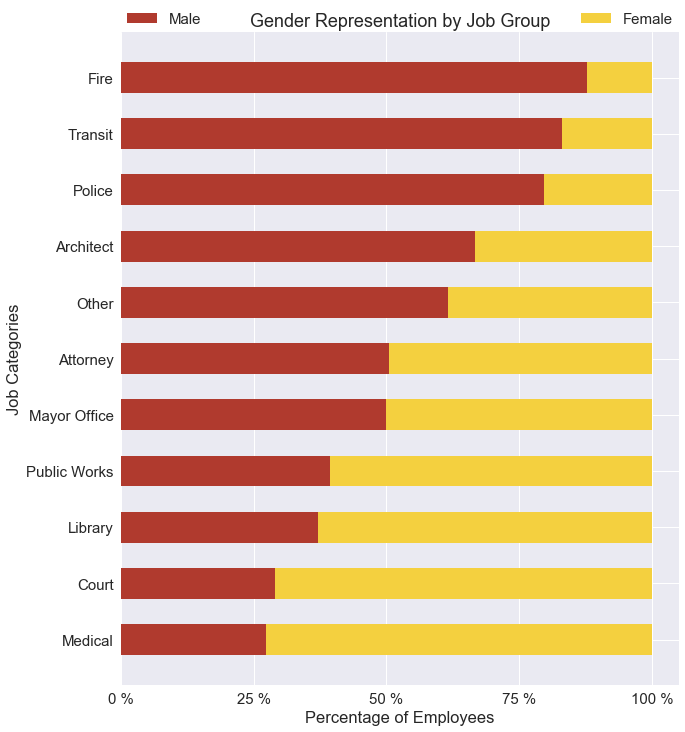

In [134]:
#Assigns the frequency values
f_count = contingency_table.iloc[0][0:-1].values
m_count = contingency_table.iloc[1][0:-1].values

final_sum = contingency_table.iloc[2][0:-1]
f_percent = f_count*100/final_sum
m_percent = m_count*100/final_sum


m_percent=m_percent.sort_values(ascending=True)
f_percent=f_percent.sort_values(ascending=False)
length = range(len(f_percent))

#Plots the stacked bar chart
fig = plt.figure(figsize=(10, 12))
sns.set(font_scale=1.5)
p1 = plt.barh(length, m_percent.values, 0.55, label='Male', color='#B03A2E')
p2 = plt.barh(length, f_percent, 0.55, left=m_percent, color='#F4D03F', label='Female')



labels = m_percent.index
plt.yticks(range(len(m_percent)), labels)
plt.xticks([0, 25, 50, 75, 100], ['0 %', '25 %', '50 %', '75 %', '100 %'])
plt.xlabel('Percentage of Employees')
plt.ylabel('Job Categories')
plt.title('Gender Representation by Job Group')
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc=3,
           ncol=2, mode="expand", borderaxespad=0)
plt.show()

In [128]:
length = range(len(f_percent))
print(length)

range(0, 11)
